# Testing of ANN models for combustion

Simple tests for the generated ANN models are made possible on python. These include:

+ Test on 0D ignition simulations
+ Test on the prediction of reaction rate of stationary 1D flames (*a priori* testing)

In [23]:
from ai_reacting_flows.ann_model_generation.model_testing import ModelTesting

In [ ]:
%load_ext autoreload
%autoreload 2

Parameters for the testing:

In [ ]:
# Dictionary with parameters
testing_parameters = {}

testing_parameters["models_folder"] = "./MODEL_LOG_RESAMPLED_3Z"     # Folder for the ML model
 
testing_parameters["fuel"] = "H2"            # Considered fuel
testing_parameters["with_N_chemistry"] = False         # Nitrogen chemistry considered or not

testing_parameters["spec_to_plot"] = ["N2", "H2", "O2", "H2O", "H2O2"]          # List of species to plot
testing_parameters["pv_species"] = ["H2O"]            # Species used for progress variable computation

testing_parameters["hybrid_ann_cvode"] = False             # CVODE helping ANN based on a conservation criterion
testing_parameters["hybrid_ann_cvode_tol"] = 5.0e-05      # Tolerance for the CVODE switching


The model testing is first initialized:

In [ ]:
test = ModelTesting(testing_parameters)

We can test the ability of the ANN model to reproduce the ignition of a homogeneous 0-D mixture. The mixture initial state is defined by its temperature $T_0$, its pressure $p$ and its equivalence ratio $\phi$. The simulation is here advanced in time using (i) the CVODE algorithm from CANTERA; (ii) the ANN model.

In [ ]:
phi = 0.4
T0 = 1200.0
pressure = 101325.0
dt = 0.5e-6
nb_ite = 1000

test.test_0D_ignition(phi, T0, pressure, dt, nb_ite)

Another test, if the ANN has been built for that, is to assess its ability to reproduce laminar premixed flames. The test here is *a priori*, in the sense that we take a CANTERA converged solution, and compare the exact reaction rate to the ANN reaction rate. For a species $k$, if the exact solution is written $Y_k$, the local reaction rate is estimated as:

$$ \dot{\omega}_k = \frac{Y_k(dt) - Y_k}{dt} $$

where $Y_k(dt)$ is the solution $Y_k$ advanced by a time increment $dt$, estimated using either CVODE or ANN.

Computing Cantera 1D flame with T0 = 300.0 K and phi = 0.4
Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current poi

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 473ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 24ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 23ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 26ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 1 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 1 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 64ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 24ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 24ms/step
Current point in cluster: 2 

1/1 [==============================] - ETA: 0s

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 2 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step
Current point in cluster: 2 

1/1 [==============================] - 0s 18ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


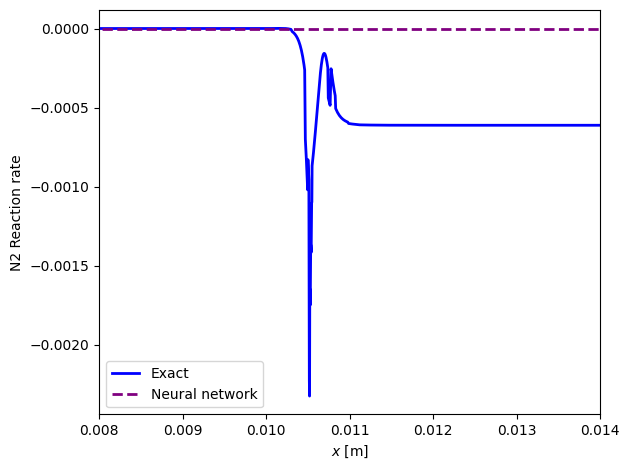

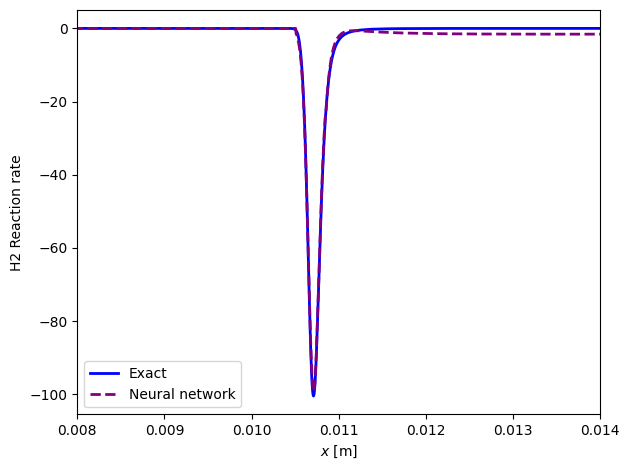

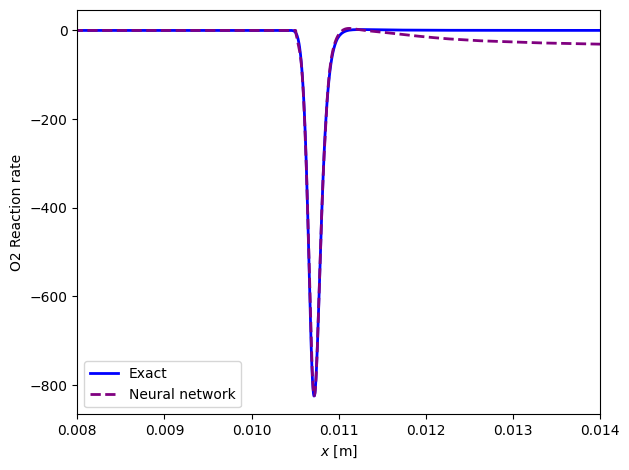

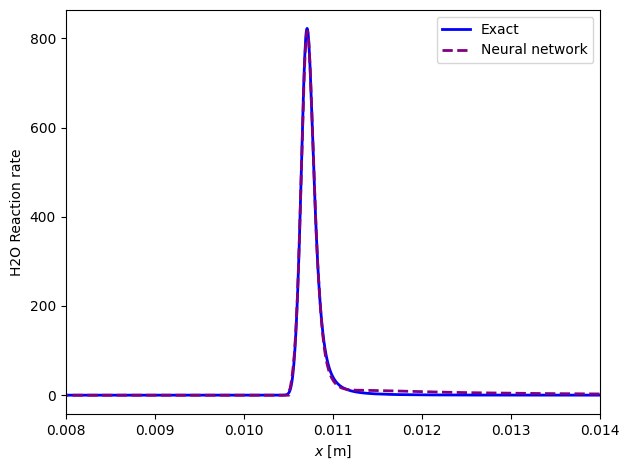

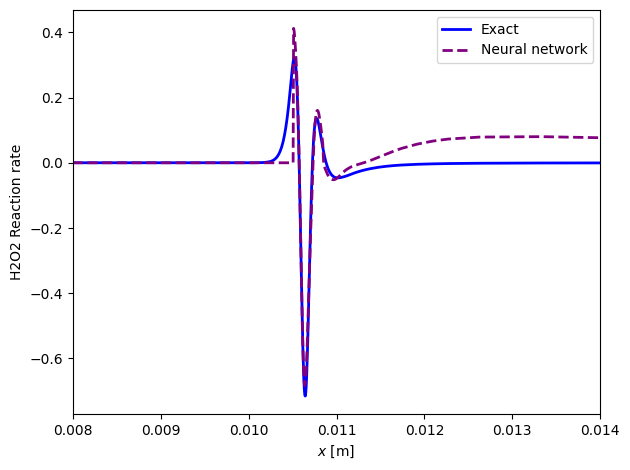

In [22]:
phi = 0.4
T0 = 300.0
pressure = 101325.0
dt = 0.5e-6
T_threshold = 600.0

test.test_1D_premixed(phi, T0, pressure, dt, T_threshold)